In [10]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

energy

In [11]:
df = pd.read_csv("energy.csv")

schema_order = ["S1", "S2", "S3", "S4", "S5" , "S6", "S7", "S8", "S9"]

bar_width = 0.15

def max_abs_scale(series):
    return series / series.abs().max()

# df.head()

In [12]:
dftt = df.copy()

mean_df = dftt.groupby(['schema'], as_index=False)['cpu0_package_joules'].mean()
mean_df.rename(columns={'cpu0_package_joules': 'mean_cpu0_package_joules'}, inplace=True)
std_df = dftt.groupby(['schema'], as_index=False)['cpu0_package_joules'].std()
std_df.rename(columns={'cpu0_package_joules': 'std_cpu0_package_joules'}, inplace=True)

dftt = std_df.merge(mean_df, on=['schema'])
dfe_max_abs = dftt.copy()
dfe_max_abs['mean_cpu0_package_joules'] = dfe_max_abs['mean_cpu0_package_joules'].transform(max_abs_scale).round(2)
dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)
dfe_max_abs = dfe_max_abs.sort_values(['schema'])

# dfe_max_abs

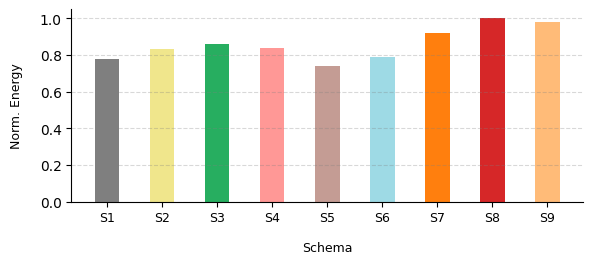

In [13]:

color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5",
    "#ff7f0e",
    "#d62728", 
    "#ffbb78",
]

fig, ax = plt.subplots(figsize=(6.6, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9"]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['mean_cpu0_package_joules'], color=color_mapping, width=0.45)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Energy', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()

In [116]:
df = pd.read_csv("result.csv")

def max_abs_scale(series):
    return series / series.abs().max()

In [117]:
df.head()

,chunkdir,schema,expe,video,process,pull,push
0,chunk.8,S1,1,queen.mp4,9.448759,0.329683,1.432079
1,chunk.9,S1,1,queen.mp4,10.120705,0.305851,1.742742
2,chunk.3,S1,1,queen.mp4,10.887279,0.311643,2.638952
3,chunk.1,S1,1,queen.mp4,12.620321,0.330226,1.984065
4,chunk.4,S1,1,queen.mp4,13.157984,0.328108,1.883223


In [118]:
df_copy = df.copy()

In [119]:
df_copy = df_copy.groupby(['schema', 'expe'], as_index=False)[['process', 'pull', 'push']].sum()

In [120]:
df_copy

,schema,expe,process,pull,push
0,S1,1,137.382603,3.136974,21.960695
1,S1,2,139.356134,3.266056,23.798379
2,S1,3,137.414560,2.502362,24.964176
3,S1,4,138.520196,2.109136,49.425927
4,S1,5,138.194343,2.204937,24.140631
...,...,...,...,...,...
259,S9,20,172.283755,2.258206,27.511800
260,S9,21,170.945294,2.112375,32.502515
261,S9,22,171.333136,2.402461,28.118657
262,S9,23,172.271443,2.046559,42.947523


In [121]:
df_copy = df_copy.groupby(['schema'], as_index=False)[['process', 'pull', 'push']].mean()

In [122]:
df_copy["PullAndPush"] = df_copy["pull"] + df_copy["push"]
df_copy["total"] = df_copy["PullAndPush"] + df_copy["process"]

df_copy

,schema,process,pull,push,PullAndPush,total
0,S1,138.231575,2.573557,25.687680,28.261237,166.492811
1,S2,155.397731,1.729734,23.051364,24.781097,180.178829
2,S3,158.214228,2.761874,23.095026,25.856899,184.071127
3,S4,153.159933,2.533604,22.057932,24.591535,177.751468
4,S5,132.766668,2.759463,21.810779,24.570242,157.336911
5,S6,148.754202,1.989908,19.075255,21.065162,169.819364
6,S7,156.221558,3.176334,31.237834,34.414167,190.635725
7,S8,174.992843,3.283982,28.402907,31.686889,206.679732
8,S9,172.035316,2.346053,29.731926,32.077979,204.113295


In [123]:
 
dfe_max_abs = df_copy.copy()

dfe_max_abs['totalNorm'] = dfe_max_abs['total'].transform(max_abs_scale).round(2)

dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)

dfe_max_abs = dfe_max_abs.sort_values(['schema'])

dfe_max_abs

,schema,process,pull,push,PullAndPush,total,totalNorm
0,S1,138.231575,2.573557,25.687680,28.261237,166.492811,0.81
1,S2,155.397731,1.729734,23.051364,24.781097,180.178829,0.87
2,S3,158.214228,2.761874,23.095026,25.856899,184.071127,0.89
3,S4,153.159933,2.533604,22.057932,24.591535,177.751468,0.86
4,S5,132.766668,2.759463,21.810779,24.570242,157.336911,0.76
5,S6,148.754202,1.989908,19.075255,21.065162,169.819364,0.82
6,S7,156.221558,3.176334,31.237834,34.414167,190.635725,0.92
7,S8,174.992843,3.283982,28.402907,31.686889,206.679732,1.00
8,S9,172.035316,2.346053,29.731926,32.077979,204.113295,0.99


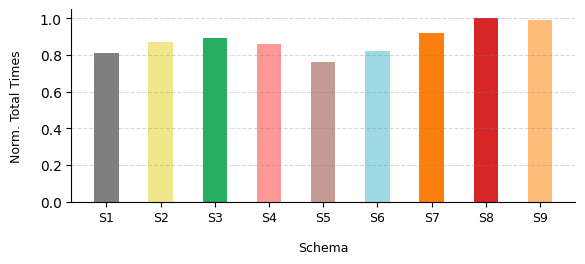

In [124]:

color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5",
    "#ff7f0e",
    "#d62728", 
    "#ffbb78",
]

fig, ax = plt.subplots(figsize=(6.5, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9"]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['totalNorm'], color=color_mapping, width=0.45)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Total Times', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()

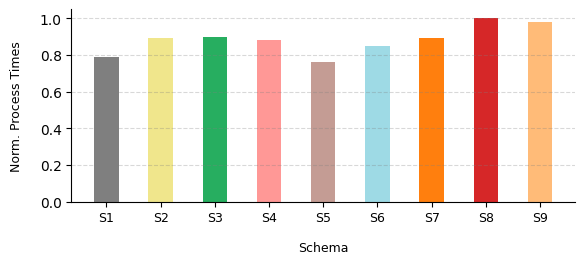

In [125]:
 
dfe_max_abs = df_copy.copy()

dfe_max_abs['ProcessNorm'] = dfe_max_abs['process'].transform(max_abs_scale).round(2)

dfe_max_abs['schema'] = pd.Categorical(dfe_max_abs['schema'], categories=schema_order, ordered=True)

dfe_max_abs = dfe_max_abs.sort_values(['schema'])

dfe_max_abs


color_mapping = [
    "#7f7f7f",
    "#f0e68c",
    "#27ae60",
    "#ff9896",
    "#c49c94",
    "#9edae5",
    "#ff7f0e",
    "#d62728", 
    "#ffbb78",
]

fig, ax = plt.subplots(figsize=(6.5, 2.5))

labs = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9"]

schema = dfe_max_abs['schema'].unique()

bars = ax.bar(range(len(schema)), dfe_max_abs['ProcessNorm'], color=color_mapping, width=0.45)

ax.set_xticks(range(len(schema)))  
ax.set_xticklabels(labs, fontsize=9)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_ylabel('Norm. Process Times', fontsize=9, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Schema', fontsize=9, labelpad=12)
plt.show()